Старые данные

In [13]:
import glob

files_wm = sorted(glob.glob('/Users/daniilvlasenko/Programming/HCP_data_v1/ensemble_graphs/WM/*'))
wm_rl_0 = files_wm[2::4][70:]
wm_rl_2 = files_wm[3::4][70:]

import pandas
import numpy
from igraph import Graph

A_mean_wm_rl_0 = []
A_mean_wm_rl_2 = []

for file in wm_rl_0:
    edges = pandas.read_csv(file)
    g = Graph.DataFrame(edges, directed=False)
    A = numpy.array(g.get_adjacency(attribute="edge_weight").data)[1:, 1:]
    A_mean_wm_rl_0.append(A)
A_mean_wm_rl_0 = numpy.mean(A_mean_wm_rl_0, axis=0)
    
for file in wm_rl_2:
    edges = pandas.read_csv(file)
    g = Graph.DataFrame(edges, directed=False)
    A = numpy.array(g.get_adjacency(attribute="edge_weight").data)[1:, 1:]
    A_mean_wm_rl_2.append(A)
A_mean_wm_rl_2 = numpy.mean(A_mean_wm_rl_2, axis=0)

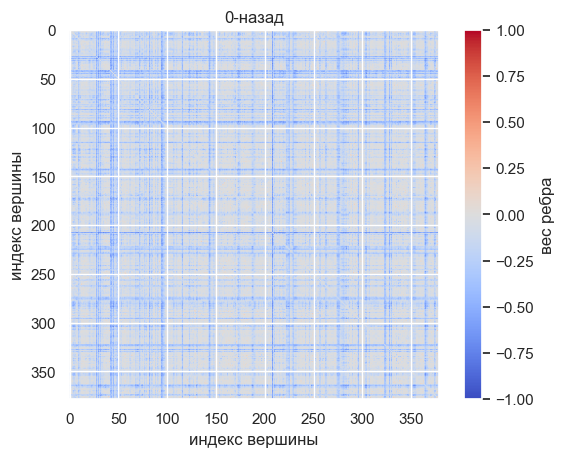

In [14]:
import matplotlib.pyplot as plt

plt.imshow(A_mean_wm_rl_0, cmap='coolwarm', vmin=-1, vmax=1)
# plt.colorbar() # отображаем цветовую шкалу
plt.colorbar(label="вес ребра")
plt.title('0-назад')
plt.xlabel('индекс вершины')
plt.ylabel('индекс вершины')

# plt.savefig('img/0-back task.pdf', format='pdf')
# plt.savefig('img/WM 0-назад.pdf', format='pdf')
plt.show()

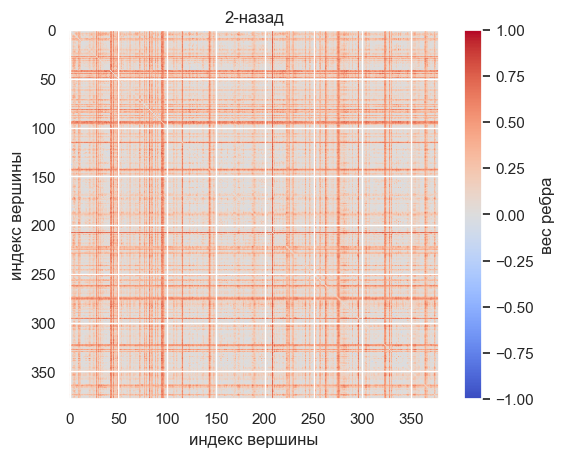

In [15]:
plt.imshow(A_mean_wm_rl_2, cmap='coolwarm', vmin=-1, vmax=1)
# plt.colorbar() 
plt.colorbar(label="вес ребра")  # отображаем цветовую шкалу
plt.title('2-назад')
plt.xlabel('индекс вершины')
plt.ylabel('индекс вершины')

# plt.savefig('img/2-back task.pdf', format='pdf')
# plt.savefig('img/WM 2-назад.pdf', format='pdf')
plt.show()

новые данные

In [58]:
import glob

files_wm = sorted(glob.glob('/Users/daniilvlasenko/Programming/HSE_HCP_fMRI_ensemble_graphs/tmp/train_to_test/*'))
wm_rl_0 = files_wm[::2]
wm_rl_2 = files_wm[1::2]

import numpy
A_mean_wm_rl_0 = []
A_mean_wm_rl_2 = []

for file in wm_rl_0:
    edges = numpy.load(file)
    A_mean_wm_rl_0.append(edges)
A_mean_wm_rl_0 = numpy.mean(A_mean_wm_rl_0, axis=0)
    
for file in wm_rl_2:
    edges = numpy.load(file)
    A_mean_wm_rl_2.append(edges)
A_mean_wm_rl_2 = numpy.mean(A_mean_wm_rl_2, axis=0)

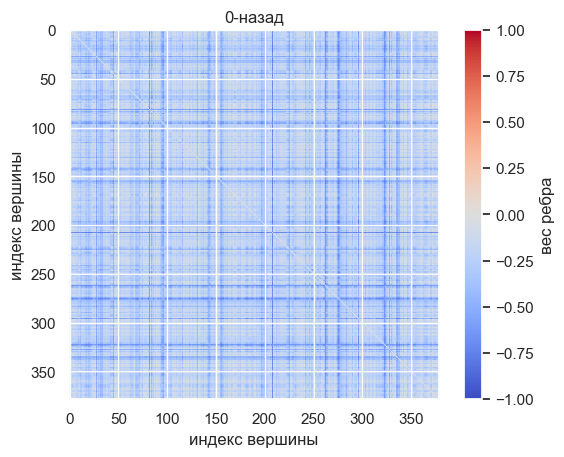

In [59]:
import matplotlib.pyplot as plt

plt.imshow(A_mean_wm_rl_0, cmap='coolwarm', vmin=-1, vmax=1)
# plt.colorbar() # отображаем цветовую шкалу
plt.colorbar(label="вес ребра")
plt.title('0-назад')
plt.xlabel('индекс вершины')
plt.ylabel('индекс вершины')

# plt.savefig('img/0-back task.pdf', format='pdf')
# plt.savefig('img/WM 0-назад.pdf', format='pdf')
plt.show()

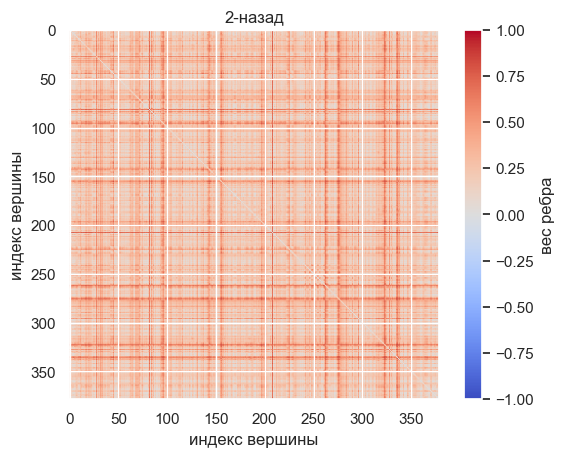

In [60]:
plt.imshow(A_mean_wm_rl_2, cmap='coolwarm', vmin=-1, vmax=1)
# plt.colorbar() 
plt.colorbar(label="вес ребра")  # отображаем цветовую шкалу
plt.title('2-назад')
plt.xlabel('индекс вершины')
plt.ylabel('индекс вершины')

# plt.savefig('img/2-back task.pdf', format='pdf')
# plt.savefig('img/WM 2-назад.pdf', format='pdf')
plt.show()

In [22]:
import glob
import paths

for fold, folder_wm in enumerate(paths.folders_mean_ensemble_edges_test_wm): 
    files_wm = sorted(glob.glob(f'{folder_wm}/*'))
    wm_rl_0 = files_wm[::2]
    wm_rl_2 = files_wm[1::2]
    
    import numpy
    A_mean_wm_rl_0 = []
    A_mean_wm_rl_2 = []
    
    for file in wm_rl_0:
        edges = numpy.load(file)
        A_mean_wm_rl_0.append(edges)
    A_mean_wm_rl_0 = numpy.mean(A_mean_wm_rl_0, axis=(1, 2))
        
    for file in wm_rl_2:
        edges = numpy.load(file)
        A_mean_wm_rl_2.append(edges)
    A_mean_wm_rl_2 = numpy.mean(A_mean_wm_rl_2, axis=(1, 2))
    print('fold', fold)
    print('acc for 0:', sum(A_mean_wm_rl_0 < 0) / len(A_mean_wm_rl_0) * 100 )
    print('acc for 1:', sum(A_mean_wm_rl_2 > 0) / len(A_mean_wm_rl_2) * 100 )

fold 0
acc for 0: 98.63013698630137
acc for 1: 100.0
fold 1
acc for 0: 97.24137931034483
acc for 1: 99.3103448275862
fold 2
acc for 0: 97.93103448275862
acc for 1: 97.93103448275862
fold 3
acc for 0: 96.55172413793103
acc for 1: 95.17241379310344


In [23]:
import glob
import paths

for fold_gnn, folder_gnn in enumerate(paths.folders_mean_ensemble_edges_train_wm):
    print('fold_gnn', fold_gnn)
    for fold_ensemble, folder_ensemble in enumerate(folder_gnn): 
        files_wm = sorted(glob.glob(f'{folder_ensemble}/*'))
        wm_rl_0 = files_wm[::2]
        wm_rl_2 = files_wm[1::2]
        
        import numpy
        A_mean_wm_rl_0 = []
        A_mean_wm_rl_2 = []
        
        for file in wm_rl_0:
            edges = numpy.load(file)
            A_mean_wm_rl_0.append(edges)
        A_mean_wm_rl_0 = numpy.mean(A_mean_wm_rl_0, axis=(1, 2))
            
        for file in wm_rl_2:
            edges = numpy.load(file)
            A_mean_wm_rl_2.append(edges)
        A_mean_wm_rl_2 = numpy.mean(A_mean_wm_rl_2, axis=(1, 2))
        print('fold_ensemble', fold_ensemble)
        print('acc for 0:', sum(A_mean_wm_rl_0 < 0) / len(A_mean_wm_rl_0) * 100 )
        print('acc for 1:', sum(A_mean_wm_rl_2 > 0) / len(A_mean_wm_rl_2) * 100 )

fold_gnn 0
fold_ensemble 0
acc for 0: 97.93103448275862
acc for 1: 97.93103448275862
fold_ensemble 1
acc for 0: 96.55172413793103
acc for 1: 96.55172413793103
fold_ensemble 2
acc for 0: 97.24137931034483
acc for 1: 100.0
fold_gnn 1
fold_ensemble 0
acc for 0: 97.26027397260275
acc for 1: 95.2054794520548
fold_ensemble 1
acc for 0: 97.93103448275862
acc for 1: 97.93103448275862
fold_ensemble 2
acc for 0: 96.55172413793103
acc for 1: 99.3103448275862
fold_gnn 2
fold_ensemble 0
acc for 0: 95.8904109589041
acc for 1: 98.63013698630137
fold_ensemble 1
acc for 0: 98.62068965517241
acc for 1: 98.62068965517241
fold_ensemble 2
acc for 0: 98.62068965517241
acc for 1: 95.17241379310344
fold_gnn 3
fold_ensemble 0
acc for 0: 95.2054794520548
acc for 1: 99.31506849315068
fold_ensemble 1
acc for 0: 99.3103448275862
acc for 1: 99.3103448275862
fold_ensemble 2
acc for 0: 95.86206896551724
acc for 1: 98.62068965517241


In [19]:
sum(A_mean_wm_rl_2 > 0) / len(A_mean_wm_rl_2) * 100 

89.65517241379311

In [16]:
for i in zip(1, [i for i in range(10)]):
    print(i)

TypeError: 'int' object is not iterable